<a href="https://colab.research.google.com/github/natgoodrich371/Goodrich_N_CS4200_Assignment_2/blob/main/Covid_Case_Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving us_covid_case.csv to us_covid_case.csv


In [ ]:


import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt



In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['us_covid_case.csv']))

In [ ]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,reproduction_rate,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
0,USA,North America,United States,12/14/2020,16672597,200631,1.06,1493348.0,228621284.0,0.121,8.3,26139,22729,3974,4324
1,USA,North America,United States,12/15/2020,16894649,222052,1.05,1944443.0,230565727.0,0.120,8.4,74848,69239,4169,48709
2,USA,North America,United States,12/16/2020,17135340,240691,1.04,2076401.0,232642128.0,0.122,8.2,233665,222622,4551,158817
3,USA,North America,United States,12/17/2020,17372569,237229,1.03,2052173.0,234694301.0,0.123,8.1,504219,486137,5114,270554
4,USA,North America,United States,12/18/2020,17621530,248961,1.02,2021329.0,236715630.0,0.124,8.1,917519,890864,6098,413300


In [ ]:
data.describe()

,total_cases,new_cases,reproduction_rate,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
count,3.430000e+02,343.000000,332.000000,3.370000e+02,3.370000e+02,337.000000,337.000000,3.430000e+02,3.430000e+02,3.430000e+02,3.430000e+02
mean,3.374247e+07,91133.017493,0.993735,1.244994e+06,4.433987e+08,0.066703,19.996736,2.550672e+08,1.423921e+08,1.141179e+08,1.319639e+06
std,7.467455e+06,70499.786473,0.195397,4.932878e+05,1.111960e+08,0.032775,12.130264,1.464307e+08,7.563771e+07,7.119283e+07,9.816426e+05
min,1.667260e+07,3824.000000,0.710000,2.598230e+05,2.286213e+08,0.018000,6.900000,2.613900e+04,2.272900e+04,3.974000e+03,4.324000e+03
25%,2.926335e+07,36198.000000,0.870000,8.367160e+05,3.562602e+08,0.044000,10.600000,1.106973e+08,7.091530e+07,3.854546e+07,6.184565e+05
50%,3.340301e+07,68532.000000,0.950000,1.236651e+06,4.511338e+08,0.056000,17.900000,3.153409e+08,1.755209e+08,1.460017e+08,9.696910e+05
75%,3.885015e+07,130515.000000,1.060000,1.621187e+06,5.215219e+08,0.095000,22.600000,3.743242e+08,2.059116e+08,1.753507e+08,1.816972e+06
max,4.773059e+07,303492.000000,1.530000,2.334455e+06,6.466909e+08,0.144000,55.500000,4.526580e+08,2.307326e+08,1.949096e+08,4.519653e+06


In [ ]:
data.shape

(343, 15)

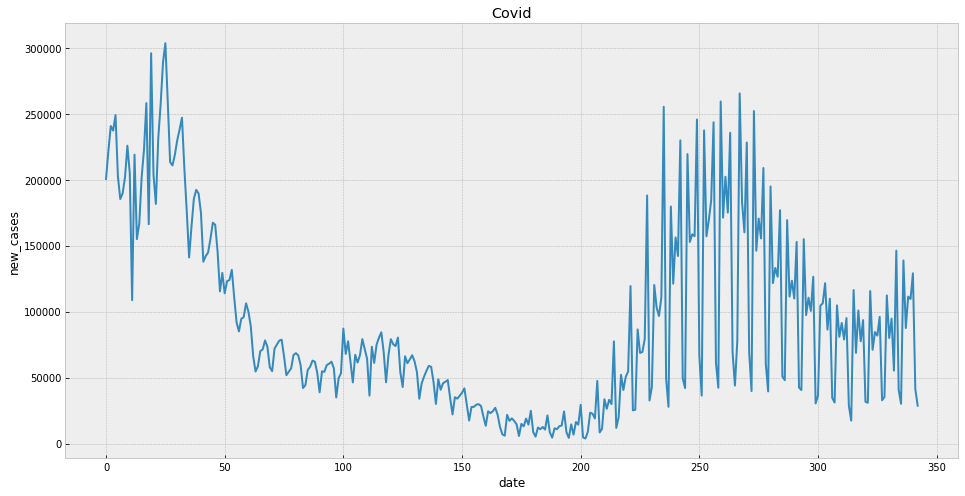

In [ ]:
plt.style.use('bmh')
plt.figure(figsize=(16,8))
plt.title('Covid')
plt.xlabel('date')
plt.ylabel('new_cases')
plt.plot(data['new_cases']) #this is the Close column on the csv
plt.show()

In [ ]:
#get the close price
df = data[['new_cases']]
print(df.head(4))

   new_cases
0     200631
1     222052
2     240691
3     237229


In [ ]:
#create vairable to predict x days in the future
future_days = 25

#create new column (target) shifted x unit/days up
df['Prediction'] = df[['new_cases']].shift(-future_days)
print(df.head(30))

    new_cases  Prediction
0      200631    303492.0
1      222052    259543.0
2      240691    213378.0
3      237229    210848.0
4      248961    218908.0
5      202571    229845.0
6      185349    238038.0
7      189717    247026.0
8      201973    208632.0
9      225783    176588.0
10     204888    141071.0
11     108685    164286.0
12     218995    185392.0
13     154995    192327.0
14     166685    189528.0
15     201696    174864.0
16     222927    137833.0
17     258109    142118.0
18     166255    144784.0
19     295882    155137.0
20     203652    167434.0
21     181660    165847.0
22     231261    145685.0
23     256866    115429.0
24     288641    129368.0
25     303492    113873.0
26     259543    123113.0
27     213378    123928.0
28     210848    131662.0
29     218908    110954.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
import numpy as np
X = np.array(df.drop(['Prediction'], axis=1))[:-future_days]
print(X)

[[200631]
 [222052]
 [240691]
 [237229]
 [248961]
 [202571]
 [185349]
 [189717]
 [201973]
 [225783]
 [204888]
 [108685]
 [218995]
 [154995]
 [166685]
 [201696]
 [222927]
 [258109]
 [166255]
 [295882]
 [203652]
 [181660]
 [231261]
 [256866]
 [288641]
 [303492]
 [259543]
 [213378]
 [210848]
 [218908]
 [229845]
 [238038]
 [247026]
 [208632]
 [176588]
 [141071]
 [164286]
 [185392]
 [192327]
 [189528]
 [174864]
 [137833]
 [142118]
 [144784]
 [155137]
 [167434]
 [165847]
 [145685]
 [115429]
 [129368]
 [113873]
 [123113]
 [123928]
 [131662]
 [110954]
 [ 91883]
 [ 85009]
 [ 94595]
 [ 95832]
 [106303]
 [100031]
 [ 88854]
 [ 66349]
 [ 54643]
 [ 58603]
 [ 70069]
 [ 71356]
 [ 78186]
 [ 73407]
 [ 57896]
 [ 54838]
 [ 72016]
 [ 75012]
 [ 78057]
 [ 78735]
 [ 66066]
 [ 51867]
 [ 54489]
 [ 57067]
 [ 67149]
 [ 68532]
 [ 66865]
 [ 59295]
 [ 42066]
 [ 44312]
 [ 55806]
 [ 58231]
 [ 62891]
 [ 62073]
 [ 53592]
 [ 38852]
 [ 54768]
 [ 54381]
 [ 59487]
 [ 60525]
 [ 62065]
 [ 57022]
 [ 34978]
 [ 49481]
 [ 53299]


In [ ]:
y = np.array(df['Prediction'])[:-future_days] #want all the data expect from the future days
print(y)

[303492. 259543. 213378. 210848. 218908. 229845. 238038. 247026. 208632.
 176588. 141071. 164286. 185392. 192327. 189528. 174864. 137833. 142118.
 144784. 155137. 167434. 165847. 145685. 115429. 129368. 113873. 123113.
 123928. 131662. 110954.  91883.  85009.  94595.  95832. 106303. 100031.
  88854.  66349.  54643.  58603.  70069.  71356.  78186.  73407.  57896.
  54838.  72016.  75012.  78057.  78735.  66066.  51867.  54489.  57067.
  67149.  68532.  66865.  59295.  42066.  44312.  55806.  58231.  62891.
  62073.  53592.  38852.  54768.  54381.  59487.  60525.  62065.  57022.
  34978.  49481.  53299.  87121.  67976.  77545.  62223.  46354.  67298.
  61437.  66972.  79189.  71849.  64247.  36354.  73448.  61144.  74990.
  80253.  84337.  69294.  46443.  66959.  79144.  75316.  73910.  80378.
  54162.  42884.  66173.  60920.  63824.  66990.  62379.  54193.  33974.
  45660.  50734.  55094.  58914.  58160.  46660.  30061.  48770.  40800.
  45702.  46955.  48107.  34519.  22100.  35152.  3

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

#create the models and the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train) 

#Create the linear regresion model
lr = LinearRegression().fit(x_train, y_train)

#Get the last x rows of the feature data set
x_future = df.drop(['Prediction'], axis =1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
print(x_future)

[[ 40574]
 [154964]
 [ 97376]
 [110590]
 [100539]
 [126472]
 [ 30442]
 [ 36203]
 [104463]
 [106363]
 [121573]
 [ 86380]
 [109801]
 [ 34615]
 [ 31111]
 [104766]
 [ 80945]
 [ 91449]
 [ 78902]
 [ 95152]
 [ 28875]
 [ 17420]
 [116357]
 [ 68725]
 [100898]]


In [ ]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[ 77549.  93596.  31648. 259278.  28719.  71081.  84547.  81822.  96068.
  32852.  35257.  66865.  80039.  94696.  55314.  96068.  40833.  30161.
 138787.  87586. 111404. 109578. 129060.  66509.  28719.]

[ 56889.68803264 103945.4971972   80255.92697105  85691.67714415
  81557.06801824  92224.9436985   52721.75850684  55091.62052797
  83171.25627912  83952.84590594  90209.67655017  75732.57984654
  85367.11176754  54438.37614513  52996.96032808  83295.89925645
  73496.82215085  77817.77869832  72656.40762053  79341.0557447
  52077.15274619  47364.99002235  88064.00734305  68469.96676147
  81704.74732141]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


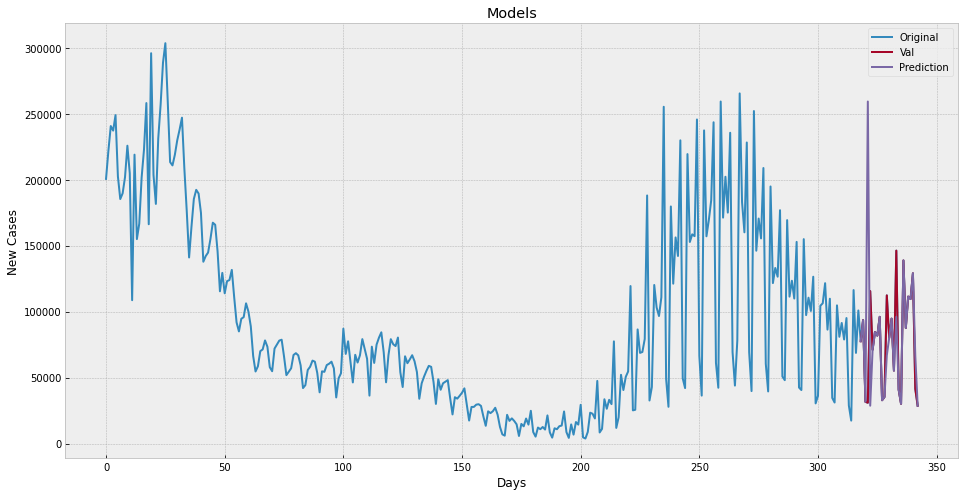

In [ ]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Models')
plt.xlabel('Days')
plt.ylabel('New Cases')

plt.plot(df['new_cases'])
plt.plot(valid[['new_cases', 'Prediction']])
plt.legend(['Original', 'Val', 'Prediction'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


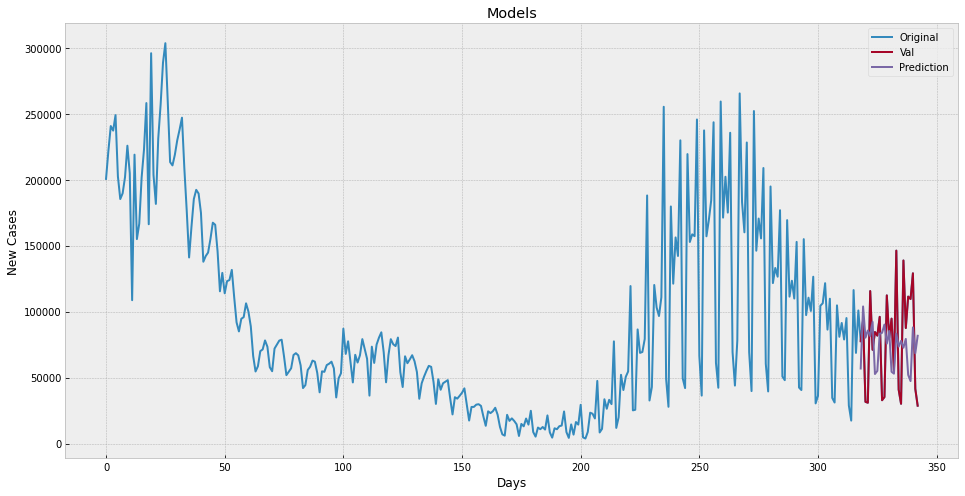

In [ ]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Models')
plt.xlabel('Days')
plt.ylabel('New Cases')

plt.plot(df['new_cases'])
plt.plot(valid[['new_cases', 'Prediction']])
plt.legend(['Original', 'Val', 'Prediction'])
plt.show()

In [ ]:
data.tail()

,iso_code,continent,location,date,total_cases,new_cases,reproduction_rate,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
338,USA,North America,United States,11/17/2021,47421741,111404,NaN,NaN,NaN,NaN,NaN,449119665,229617835,194574225,1498206
339,USA,North America,United States,11/18/2021,47531319,109578,NaN,NaN,NaN,NaN,NaN,450538888,230036540,194712947,1419223
340,USA,North America,United States,11/19/2021,47660379,129060,NaN,NaN,NaN,NaN,NaN,452017018,230475587,194855837,1478130
341,USA,North America,United States,11/20/2021,47701872,41493,NaN,NaN,NaN,NaN,NaN,452614106,230713852,194905002,597088
342,USA,North America,United States,11/21/2021,47730591,28719,NaN,NaN,NaN,NaN,NaN,452657966,230732564,194909643,43860
